# Intro to Keras

We will do our first neural networks.

In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
from sklearn.datasets import load_digits

In [3]:
X, y  = load_digits(return_X_y=True)

In [4]:
X.shape  # .shape returns the dimensions of the array

(1797, 64)

In [5]:
y.shape

(1797,)

In [6]:
img = X[0].reshape(8,8)

In [7]:
img

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

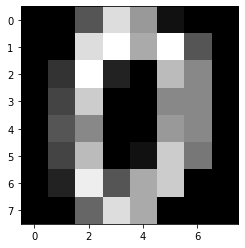

In [9]:
plt.imshow(img, cmap='gray')

In [10]:
y[0]

0

**Goal:** Create a model that estimates the class to which one digit belongs. As estimator, we will use neural networks.

- Separate in train and test data.
- Determine a structure for the model.
- Specify some performance criteria.
- Create model on train data.
- Validate / sanity check on the model using the test data.

### Split into train and test data
- Should be randomly split to avoid bias on the data.
- Random seed should be specified.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123, train_size=0.8)

In [13]:
X_train.shape

(1437, 64)

In [14]:
X_test.shape

(360, 64)

### Define the structure of the model

In [15]:
# First way of specifying the model
model = keras.models.Sequential()
model.add(keras.layers.Dense(4, input_shape=(64,),activation='relu')) # 1 layer, 4 neurons
model.add(keras.layers.Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 260       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                50        
Total params: 310
Trainable params: 310
Non-trainable params: 0
_________________________________________________________________


### Specify performance criteria 


In [17]:
model.compile(loss="sparse_categorical_crossentropy",  # metric for classification in more than 2 classes
              metrics=["accuracy"]
             ) 

### Train our model in the training data

In [18]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Train on 1293 samples, validate on 144 samples
Epoch 1/100
1293/1293 [==============================] - 1s 639us/sample - loss: 3.2283 - accuracy: 0.1338 - val_loss: 2.5018 - val_accuracy: 0.1389
Epoch 2/100
1293/1293 [==============================] - 0s 87us/sample - loss: 2.3270 - accuracy: 0.1423 - val_loss: 2.2487 - val_accuracy: 0.1528
Epoch 3/100
1293/1293 [==============================] - 0s 99us/sample - loss: 2.2058 - accuracy: 0.1678 - val_loss: 2.1516 - val_accuracy: 0.1736
Epoch 4/100
1293/1293 [==============================] - 0s 120us/sample - loss: 2.1295 - accuracy: 0.1895 - val_loss: 2.0704 - val_accuracy: 0.2708
Epoch 5/100
1293/1293 [==============================] - 0s 139us/sample - loss: 2.0598 - accuracy: 0.2274 - val_loss: 1.9588 - val_accuracy: 0.3125
Epoch 6/100
1293/1293 [==============================] - 0s 108us/sample - loss: 1.9819 - accuracy: 0.2521 - val_loss: 1.9099 - val_accuracy: 0.3194
Epoch 7/100
1293/1293 [==============================] - 0s 1

1293/1293 [==============================] - 0s 100us/sample - loss: 1.0912 - accuracy: 0.5770 - val_loss: 1.2562 - val_accuracy: 0.4792
Epoch 56/100
1293/1293 [==============================] - 0s 105us/sample - loss: 1.0862 - accuracy: 0.5824 - val_loss: 1.2448 - val_accuracy: 0.5139
Epoch 57/100
1293/1293 [==============================] - 0s 113us/sample - loss: 1.0783 - accuracy: 0.5800 - val_loss: 1.2415 - val_accuracy: 0.5208
Epoch 58/100
1293/1293 [==============================] - 0s 105us/sample - loss: 1.0734 - accuracy: 0.5770 - val_loss: 1.2437 - val_accuracy: 0.5208
Epoch 59/100
1293/1293 [==============================] - 0s 91us/sample - loss: 1.0683 - accuracy: 0.5831 - val_loss: 1.2275 - val_accuracy: 0.5278
Epoch 60/100
1293/1293 [==============================] - 0s 104us/sample - loss: 1.0635 - accuracy: 0.5777 - val_loss: 1.2392 - val_accuracy: 0.5000
Epoch 61/100
1293/1293 [==============================] - 0s 98us/sample - loss: 1.0563 - accuracy: 0.5855 - val_l

In [19]:
import pandas as pd

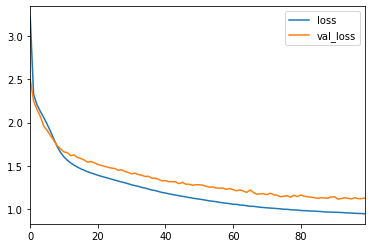

In [20]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()

In [24]:
import numpy as np

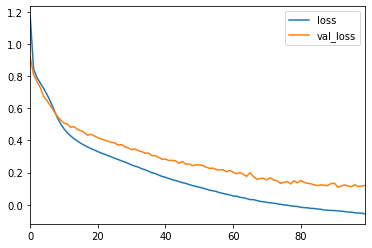

In [25]:
pd.DataFrame(history.history)[['loss', 'val_loss']].apply(np.log).plot()

### Validate the model we trained

In [26]:
y_pred_proba = model.predict(X_test)

In [35]:
y_pred = np.argmax(y_pred_proba, axis=1)

In [51]:
y_pred

array([3, 9, 4, 4, 4, 9, 7, 0, 2, 4, 0, 6, 5, 7, 6, 0, 9, 1, 0, 6, 9, 7,
       7, 5, 4, 6, 7, 0, 0, 9, 7, 6, 3, 6, 7, 4, 6, 7, 7, 6, 0, 6, 7, 0,
       7, 3, 9, 5, 3, 8, 7, 4, 6, 5, 1, 6, 4, 6, 0, 4, 3, 5, 4, 7, 8, 4,
       7, 2, 0, 7, 3, 9, 4, 3, 3, 9, 4, 3, 3, 7, 3, 0, 4, 0, 7, 7, 4, 7,
       4, 5, 7, 4, 7, 7, 6, 7, 5, 5, 7, 9, 5, 4, 6, 6, 3, 7, 2, 5, 6, 4,
       9, 8, 7, 0, 9, 0, 7, 5, 0, 5, 7, 4, 4, 7, 7, 0, 7, 9, 4, 3, 7, 3,
       7, 9, 9, 9, 6, 7, 4, 0, 7, 9, 7, 3, 7, 2, 8, 7, 1, 7, 5, 7, 9, 7,
       9, 7, 6, 0, 7, 9, 6, 0, 7, 6, 9, 7, 0, 5, 3, 6, 1, 8, 6, 7, 3, 4,
       4, 7, 0, 5, 3, 0, 8, 0, 7, 5, 3, 4, 8, 8, 3, 7, 5, 3, 7, 0, 9, 4,
       9, 4, 2, 7, 7, 0, 3, 4, 5, 7, 7, 7, 1, 7, 0, 7, 2, 9, 3, 5, 7, 3,
       8, 0, 6, 0, 7, 5, 7, 0, 4, 3, 0, 7, 5, 5, 0, 9, 9, 7, 7, 7, 4, 7,
       4, 7, 7, 3, 0, 1, 7, 3, 6, 6, 9, 5, 6, 4, 5, 4, 6, 9, 7, 7, 9, 9,
       7, 0, 4, 6, 7, 7, 3, 5, 3, 8, 0, 4, 9, 6, 8, 7, 5, 7, 4, 0, 7, 9,
       7, 6, 1, 4, 4, 7, 1, 6, 0, 4, 3, 5, 8, 5, 7,

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion_matrix(y_test, y_pred)

array([[37,  0,  0,  0,  0,  1,  1,  0,  0,  0],
       [ 0,  3,  0,  1,  1,  0,  1, 27,  1,  0],
       [ 0,  0,  1,  2,  0,  0,  0, 33,  0,  0],
       [ 0,  0,  1, 13,  0,  0,  0,  0,  1, 18],
       [ 0,  2,  0,  0, 39,  0,  0,  1,  0,  0],
       [ 5,  0,  0,  2,  0, 24,  1,  0,  0,  5],
       [ 3,  1,  0,  0,  3,  0, 35,  1,  0,  0],
       [ 0,  1,  3,  2,  0,  0,  0, 23,  1,  1],
       [ 0,  1,  1, 10,  2,  2,  0, 10, 10,  1],
       [ 0,  0,  0,  6,  0,  6,  0,  0,  0, 16]], dtype=int64)

In [46]:
idxs = (y_test == 1) & (y_pred == 7)

In [48]:
idxs[6]

True

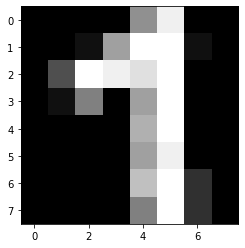

In [50]:
plt.imshow(X_test[6].reshape(8,8), cmap='gray')

In [ ]:
model.fit()